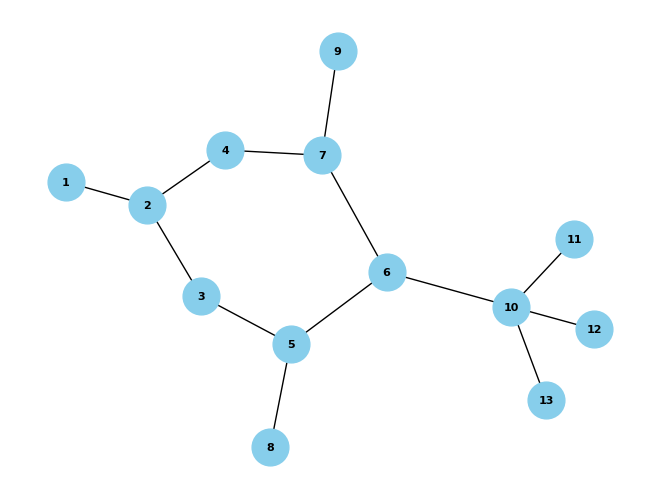

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the edges based on the connections you provided
edges = [
    (1,2), (2,3), (2,4), 
    (3,5), (4,7), (5,6), 
    (5,8), (7,6), (7,9), 
    (6,10), (10,11), (10,12), 
    (10,13)
]


# Create an undirected graph
G = nx.Graph()

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)  # You can try different layout algorithms
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)

# Display the graph
plt.show()

In [8]:
import networkx as nx

def find_shortest_path(start, end, edges):
    # Create an undirected graph
    G = nx.Graph()

    # Add edges to the graph
    G.add_edges_from(edges)

    try:
        # Find the shortest path
        shortest_path = nx.shortest_path(G, source=start, target=end)
        return shortest_path
    except nx.NetworkXNoPath:
        return None  # If there is no path between the nodes

# Example usage
edges = [
    (1,2), (2,3), (2,4), 
    (3,5), (4,7), (5,6), 
    (5,8), (7,6), (7,9), 
    (6,10), (10,11), (10,12), 
    (10,13)
]

start_node = 4
end_node = 13

path = find_shortest_path(start_node, end_node, edges)

if path:
    print(f"Shortest path from {start_node} to {end_node}: {path}")
else:
    print(f"No path found from {start_node} to {end_node}")


Shortest path from 4 to 13: [4, 7, 6, 10, 13]


Shortest path from 1 to 13: [1, 2, 3, 5, 6, 10, 13]


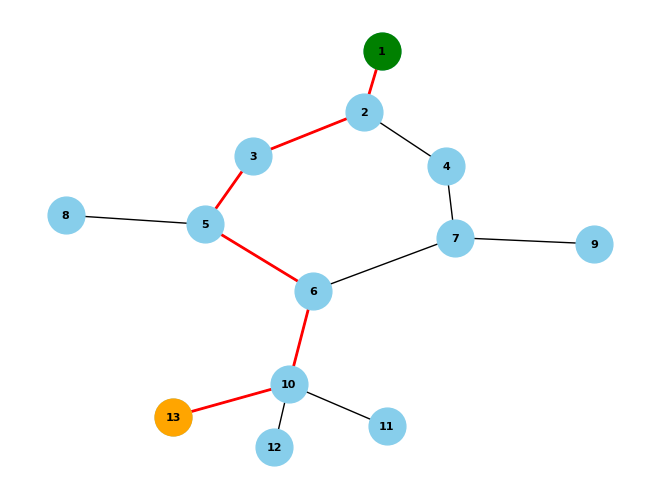

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

def find_shortest_path(start, end, edges):
    # Create an undirected graph
    G = nx.Graph()

    # Add edges to the graph
    G.add_edges_from(edges)

    try:
        # Find the shortest path
        shortest_path = nx.shortest_path(G, source=start, target=end)
        return shortest_path
    except nx.NetworkXNoPath:
        return None  # If there is no path between the nodes

def draw_graph(edges, highlight_path=None, start_node=None, end_node=None):
    # Create a graph
    G = nx.Graph()
    G.add_edges_from(edges)

    # Layout
    pos = nx.spring_layout(G)

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)

    # Highlight the path, if specified
    if highlight_path:
        path_edges = list(zip(highlight_path, highlight_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    # Mark start and end nodes
    if start_node:
        nx.draw_networkx_nodes(G, pos, nodelist=[start_node], node_color='green', node_size=700)
    if end_node:
        nx.draw_networkx_nodes(G, pos, nodelist=[end_node], node_color='orange', node_size=700)

    # Display the graph
    plt.show()

# Example usage
edges = [
    (1, 2), (2, 3), (2, 4),
    (3, 5), (4, 7), (5, 6),
    (5, 8), (7, 6), (7, 9),
    (6, 10), (10, 11), (10, 12),
    (10, 13)
]

start_node = 1
end_node = 13

path = find_shortest_path(start_node, end_node, edges)

if path:
    print(f"Shortest path from {start_node} to {end_node}: {path}")
    draw_graph(edges, highlight_path=path, start_node=start_node, end_node=end_node)
else:
    print(f"No path found from {start_node} to {end_node}")


Shortest path from 1 to 8: [1, 2, 3, 5, 8]
Directions at junctions:
At junction 2: Right
At junction 5: Right


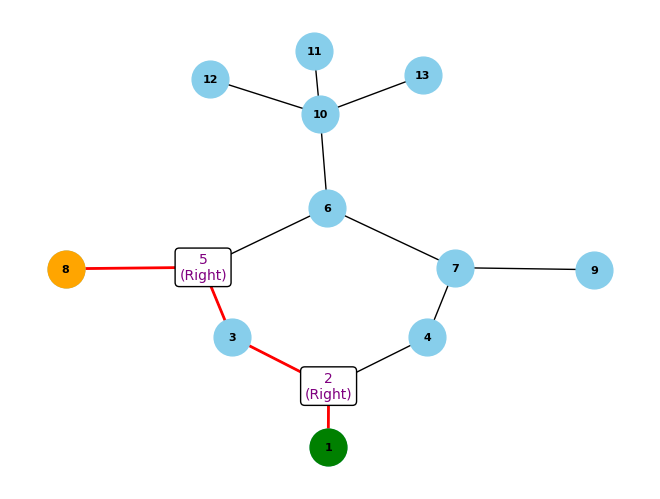

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

def find_shortest_path(start, end, edges):
    # Create an undirected graph
    G = nx.Graph()

    # Add edges to the graph
    G.add_edges_from(edges)

    try:
        # Find the shortest path
        shortest_path = nx.shortest_path(G, source=start, target=end)
        return shortest_path
    except nx.NetworkXNoPath:
        return None  # If there is no path between the nodes

def determine_direction_at_junction(current_node, next_node):
    # Determine the suggested direction at a junction
    neighbors = list(G.neighbors(next_node))

    if len(neighbors) == 1:
        return "Forward"  # Only one neighbor, continue forward
    elif current_node in neighbors:
        return "Right"  # Turn right
    else:
        return "Left"  # Turn left

def analyze_junctions_along_path(path):
    directions_at_junctions = []

    for i in range(len(path) - 1):
        current_node = path[i]
        next_node = path[i + 1]

        if G.degree(next_node) > 2:  # Check if the node is a junction
            direction_at_junction = determine_direction_at_junction(current_node, next_node)
            directions_at_junctions.append((next_node, direction_at_junction))

    return directions_at_junctions

def draw_graph(edges, highlight_path=None, junctions=None, start_node=None, end_node=None):
    # Create a graph
    G = nx.Graph()
    G.add_edges_from(edges)

    # Layout
    pos = nx.spring_layout(G)

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)

    # Highlight the path, if specified
    if highlight_path:
        path_edges = list(zip(highlight_path, highlight_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    # Mark start and end nodes
    if start_node:
        nx.draw_networkx_nodes(G, pos, nodelist=[start_node], node_color='green', node_size=700)
    if end_node:
        nx.draw_networkx_nodes(G, pos, nodelist=[end_node], node_color='orange', node_size=700)

    # Mark junctions with suggested directions
    if junctions:
        for junction, direction in junctions:
            plt.text(pos[junction][0], pos[junction][1], f"{junction}\n({direction})", ha='center', va='center', color='purple', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Display the graph
    plt.show()

# Example usage
edges = [
    (1, 2), (2, 3), (2, 4),
    (3, 5), (4, 7), (5, 6),
    (5, 8), (7, 6), (7, 9),
    (6, 10), (10, 11), (10, 12),
    (10, 13)
]

start_node = 1
end_node = 8

G = nx.Graph()
G.add_edges_from(edges)

path = find_shortest_path(start_node, end_node, edges)

if path:
    print(f"Shortest path from {start_node} to {end_node}: {path}")
    junctions_and_directions = analyze_junctions_along_path(path)
    print("Directions at junctions:")
    for junction, direction in junctions_and_directions:
        print(f"At junction {junction}: {direction}")

    draw_graph(edges, highlight_path=path, junctions=junctions_and_directions, start_node=start_node, end_node=end_node)
else:
    print(f"No path found from {start_node} to {end_node}")


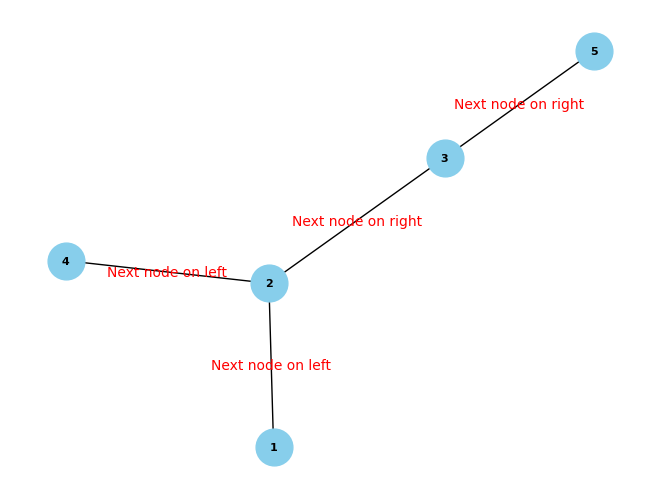

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (2, 4), (3, 5)])

# Assign positions using spring_layout
pos = nx.spring_layout(G)

# Draw the graph with node labels
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)

# Annotate the edges with relative positions
for edge in G.edges():
    start_node, end_node = edge
    start_pos = pos[start_node]
    end_pos = pos[end_node]

    # Determine if the next node is on the left or right side
    if start_pos[0] < end_pos[0]:
        side = "right"
    elif start_pos[0] > end_pos[0]:
        side = "left"
    else:
        side = "undefined"

    # Annotate the edge with the relative position
    plt.text((start_pos[0] + end_pos[0]) / 2, (start_pos[1] + end_pos[1]) / 2, f"Next node on {side}", ha='center', va='center', color='red')

# Display the graph
plt.show()


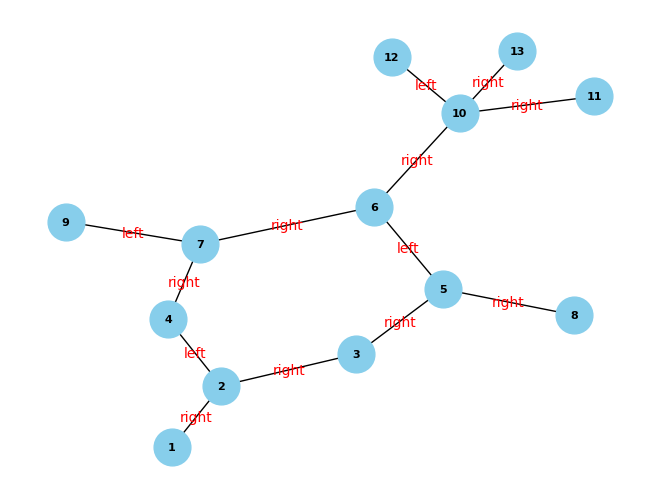

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
edges = [
    (1, 2), (2, 3), (2, 4),
    (3, 5), (4, 7), (5, 6),
    (5, 8), (7, 6), (7, 9),
    (6, 10), (10, 11), (10, 12),
    (10, 13)
]

G.add_edges_from(edges)

# Assign positions using spring_layout
pos = nx.spring_layout(G)

# Draw the graph with node labels
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)

# Annotate the edges with relative positions
for edge in G.edges():
    start_node, end_node = edge
    start_pos = pos[start_node]
    end_pos = pos[end_node]

    # Determine if the next node is on the left or right side
    if start_pos[0] < end_pos[0]:
        side = "right"
    elif start_pos[0] > end_pos[0]:
        side = "left"
    else:
        side = "undefined"

    # Annotate the edge with the relative position
    plt.text((start_pos[0] + end_pos[0]) / 2, (start_pos[1] + end_pos[1]) / 2, f"{side}", ha='center', va='center', color='red')

# Display the graph
plt.show()


In [38]:
def junction_analysis(G, path):
    junction_nodes = []

    for i in range(1, len(path) - 1):
        current_node = path[i]
        neighbors = set(G.neighbors(current_node))

        # Check if the node is a junction
        if len(neighbors) > 1:
            junction_nodes.append(current_node)

    return junction_nodes

# Example usage
edges = [
    (1, 2), (2, 3), (2, 4),
    (3, 5), (4, 7), (5, 6),
    (5, 8), (7, 6), (7, 9),
    (6, 10), (10, 11), (10, 12),
    (10, 13)
]

G = nx.Graph()
G.add_edges_from(edges)

start_node = 4
end_node = 13

path = find_shortest_path(start_node, end_node, edges)

if path:
    print(f"Shortest path from {start_node} to {end_node}: {path}")
    junction_nodes = junction_analysis(G, path)
    print("Junction nodes along the path:", junction_nodes)
else:
    print(f"No path found from {start_node} to {end_node}")


Shortest path from 4 to 13: [4, 7, 6, 10, 13]
Junction nodes along the path: [7, 6, 10]


In [39]:
def junction_analysis(G, path):
    junction_info = []

    for i in range(1, len(path) - 1):
        current_node = path[i]
        neighbors = list(G.neighbors(current_node))

        # Check if the node is a junction
        if len(neighbors) > 1:
            previous_node = path[i - 1]
            next_node = path[i + 1]

            # Determine if the next node is on the left, right, or undefined side
            if G.degree(current_node) > 2:
                if previous_node in neighbors and next_node in neighbors:
                    side = "undefined"
                elif previous_node in neighbors:
                    side = "right"
                elif next_node in neighbors:
                    side = "left"
                else:
                    side = "undefined"
            else:
                side = "undefined"

            junction_info.append((current_node, side))

    return junction_info

# Example usage
edges = [
    (1, 2), (2, 3), (2, 4),
    (3, 5), (4, 7), (5, 6),
    (5, 8), (7, 6), (7, 9),
    (6, 10), (10, 11), (10, 12),
    (10, 13)
]

G = nx.Graph()
G.add_edges_from(edges)

start_node = 4
end_node = 13

path = find_shortest_path(start_node, end_node, edges)

if path:
    print(f"Shortest path from {start_node} to {end_node}: {path}")
    junction_info = junction_analysis(G, path)
    print("Junction information along the path:", junction_info)
else:
    print(f"No path found from {start_node} to {end_node}")


Shortest path from 4 to 13: [4, 7, 6, 10, 13]
Junction information along the path: [(7, 'undefined'), (6, 'undefined'), (10, 'undefined')]


Shortest path from 1 to 13: [1, 2, 3, 5, 6, 10, 13]


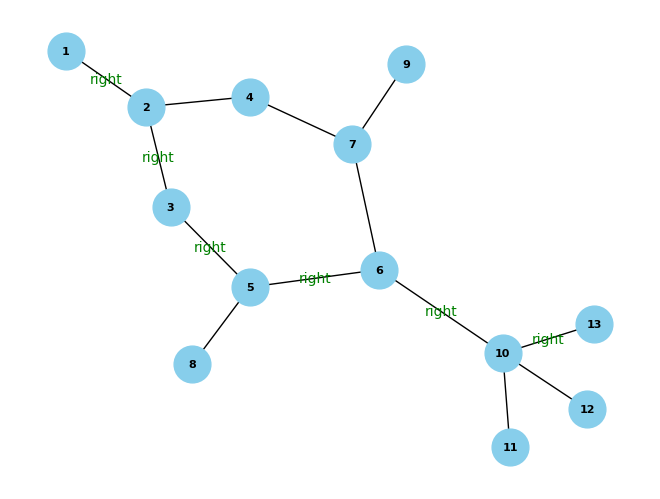

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

def find_shortest_path(start, end, edges):
    G = nx.Graph()
    G.add_edges_from(edges)
    try:
        return nx.shortest_path(G, source=start, target=end)
    except nx.NetworkXNoPath:
        return None

def annotate_edges_with_relative_position(G, pos, edges, color='red'):
    for edge in edges:
        start_node, end_node = edge
        start_pos = pos[start_node]
        end_pos = pos[end_node]

        # Determine if the next node is on the left or right side
        if start_pos[0] < end_pos[0]:
            side = "right"
        elif start_pos[0] > end_pos[0]:
            side = "left"
        else:
            side = "undefined"

        # Annotate the edge with the relative position
        plt.text((start_pos[0] + end_pos[0]) / 2, (start_pos[1] + end_pos[1]) / 2, f"{side}", ha='center', va='center', color=color)

# Create a graph
G = nx.Graph()
edges = [
    (1, 2), (2, 3), (2, 4),
    (3, 5), (4, 7), (5, 6),
    (5, 8), (7, 6), (7, 9),
    (6, 10), (10, 11), (10, 12),
    (10, 13)
]
G.add_edges_from(edges)

# Assign positions using spring_layout
pos = nx.spring_layout(G)

# Specify start and end nodes
start_node = 1
end_node = 13

# Find the shortest path
shortest_path = find_shortest_path(start_node, end_node, edges)

if shortest_path:
    print(f"Shortest path from {start_node} to {end_node}: {shortest_path}")

    # Draw the graph with node labels
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)

    # Annotate the shortest path with relative positions
    annotate_edges_with_relative_position(G, pos, zip(shortest_path[:-1], shortest_path[1:]), color='green')

    # Display the graph
    plt.show()
else:
    print(f"No path found from {start_node} to {end_node}")


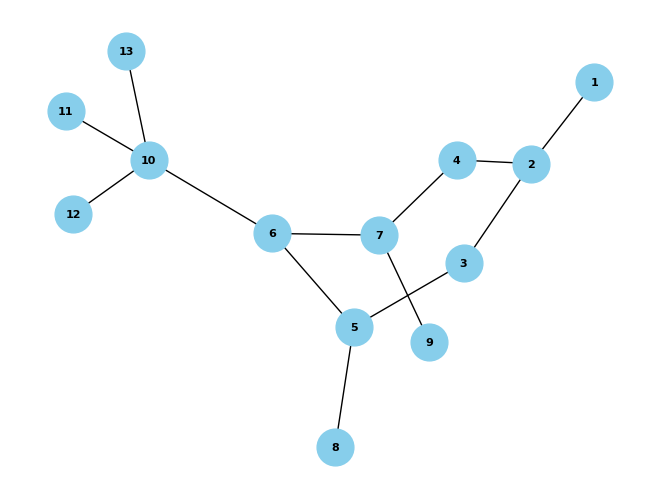

In [50]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the edges based on the connections you provided
edges = [
    (1,2), (2,3), (2,4), 
    (3,5), (4,7), (5,6), 
    (5,8), (7,6), (7,9), 
    (6,10), (10,11), (10,12), 
    (10,13)
]


# Create an undirected graph
G = nx.Graph()

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)  # You can try different layout algorithms
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)

# Display the graph
plt.show()

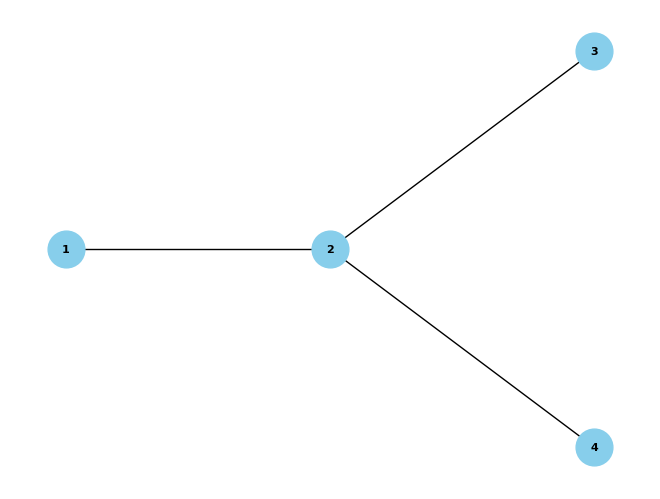

In [62]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the edges based on the connections you provided
edges = [
    (1, 2), (2, 3), (2, 4)
]

# Create an undirected graph
G = nx.Graph()

# Add edges to the graph
G.add_edges_from(edges)

# Specify node positions manually
pos = {
    1: (0, 0),  # position of node 1
    2: (1, 0),  # position of node 2
    3: (2, 1),  # position of node 3
    4: (2, -1)  # position of node 4
}

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)

# Display the graph
plt.show()


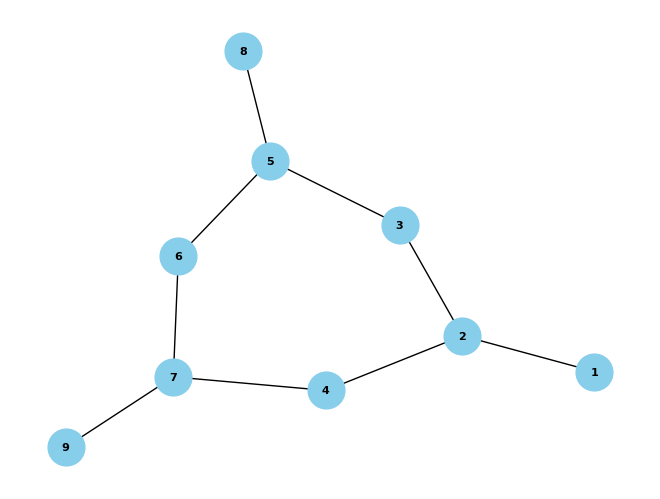

In [74]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the edges based on the connections you provided
edges = [
    (1,2), 
    (2,3), (2,4),
    (8,5), (5,3), (5,6), (6,7), (7,4), (7,9)
]


# Create an undirected graph
G = nx.Graph()

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)  # You can try different layout algorithms
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)

# Display the graph
plt.show()

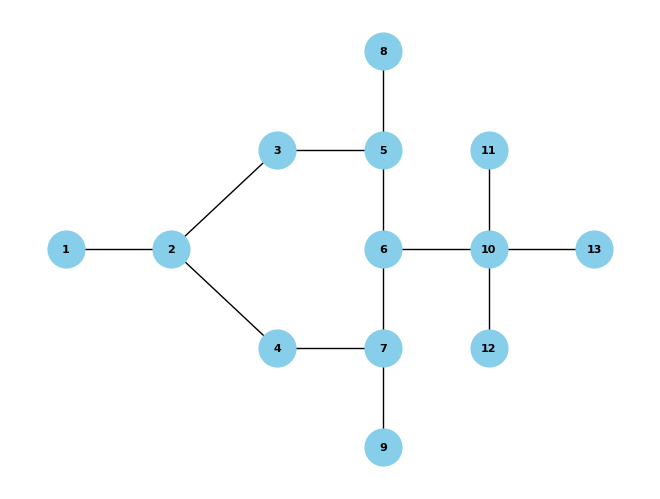

In [76]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the edges based on the connections you provided
edges = [
    (1,2), 
    (2,3), (2,4),
    (8,5), (5,3), (5,6), (6,7), (7,4), (7,9),
    (11, 10), (10, 6), (10, 12), 
    (10, 13)
]

G = nx.Graph()
G.add_edges_from(edges)

# Specify node positions manually
pos = {
    1: (0, 0),  # position of node 1
    2: (1, 0),  # position of node 2
    3: (2, 1),  # position of node 3
    4: (2, -1),  # position of node 4
    8: (3, 2),
    5: (3, 1),
    6: (3, 0),
    7: (3, -1),
    9: (3, -2),
    11: (4,1),
    10: (4,0),
    12:(4,-1),
    13: (5, 0)
}

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)

# Display the graph
plt.show()


Shortest path from 1 to 11: [1, 2, 3, 5, 6, 10, 11]
Junction nodes along the path: [2, 5, 6, 10]


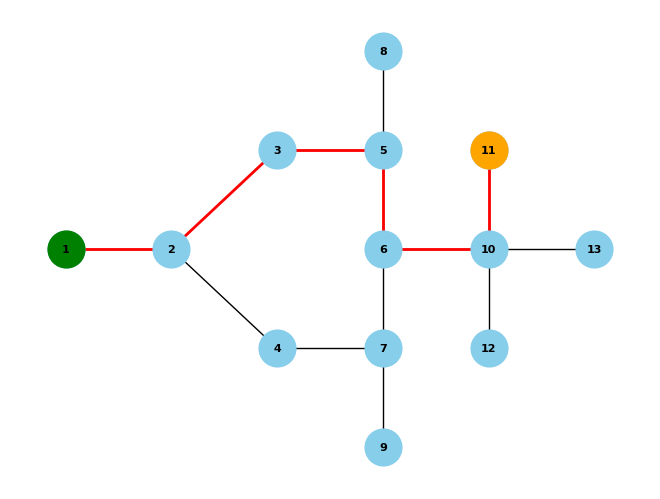

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def find_shortest_path(start, end, edges):
    G = nx.Graph()
    G.add_edges_from(edges)
    try:
        shortest_path = nx.shortest_path(G, source=start, target=end)
        return shortest_path
    except nx.NetworkXNoPath:
        return None

def draw_graph(edges, pos, highlight_path=None, start_node=None, end_node=None):
    G = nx.Graph()
    G.add_edges_from(edges)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)
    
    if highlight_path:
        path_edges = list(zip(highlight_path, highlight_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
        
    if start_node:
        nx.draw_networkx_nodes(G, pos, nodelist=[start_node], node_color='green', node_size=700)
    if end_node:
        nx.draw_networkx_nodes(G, pos, nodelist=[end_node], node_color='orange', node_size=700)
        
    plt.show()

def junction_analysis(G, path):
    junction_nodes = []

    for i in range(1, len(path) - 1):
        current_node = path[i]
        neighbors = set(G.neighbors(current_node))
        
        if len(neighbors) > 2:
            junction_nodes.append(current_node)

    return junction_nodes


edges = [
    (1, 2), (2, 3), (2, 4),
    (3, 5), (4, 7), (5, 6),
    (5, 8), (7, 6), (7, 9),
    (6, 10), (10, 11), (10, 12),
    (10, 13)
]

pos = {
    1: (0, 0),  # position of node 1
    2: (1, 0),  # position of node 2
    3: (2, 1),  # position of node 3
    4: (2, -1),  # position of node 4
    8: (3, 2),
    5: (3, 1),
    6: (3, 0),
    7: (3, -1),
    9: (3, -2),
    11: (4,1),
    10: (4,0),
    12:(4,-1),
    13: (5, 0)
    }

start_node = 1
end_node = 11

G = nx.Graph()
G.add_edges_from(edges)

path = find_shortest_path(start_node, end_node, edges)

if path:
    print(f"Shortest path from {start_node} to {end_node}: {path}")
    junction_nodes = junction_analysis(G, path)
    print("Junction nodes along the path:", junction_nodes)
    draw_graph(edges,pos, highlight_path=path, start_node=start_node, end_node=end_node)
    
else:
    print(f"No path found from {start_node} to {end_node}")
